## Background

### Pauli matrices

### Stabilizer groups

Let $G$ be a group and $X$ be a set. A **group action** $\varphi$ of $G$ on $X$ is a function $\varphi \colon G \times X \to X$ such that:
-  for all $x \in X$, we have $\varphi(\mathrm{id}_G, x) = x$;
-  for all $g,h \in G$, we have $\varphi(gh,x) = \varphi(g,\varphi(h,x))$.

Often we drop the notation $\varphi$ and simply write $gx$ to mean $\varphi(g,x)$.
The **stabilizer** of an element $x \in X$ with respect to the group action of $G$ on $X$ is the set:
\begin{equation*}
    G_x = \{ g \in G | gx = x \}.
\end{equation*}
That is, the elements of $G$ that act like the identity on $x$. Notice that $G_x$ is closed under composition and inverses:
- For elements $g$ and $h$ in $G$, we have that
\begin{equation*}
    ghx = g(hx) = g(x) = x.
\end{equation*}
- For an element $g$ in $G$, we have that
\begin{equation*}
    g^{-1}x = g^{-1}(gx) = \mathrm{id}_Gx = x.
\end{equation*}

So $G_x$ is a subgroup of $G$.

#### Example 1: Permutation groups.


Consider the symmetric group $S_3$ acting on the set $X = \{0,1,2\}$ via permutations. Each permutation $\sigma \in S_3$ can be written using integers $a_0$, $a_1$ and $a_2$ such that $\{a_0,a_1,a_2\} = \{0,1,2\}$ by assigning
\begin{equation*}
    0 \to a_0, \;\; 1 \to a_1, \; \; 2 \to a_2.
\end{equation*}
We can represent this more compactly by a tuple $\sigma = (a_0,a_1,a_2)$ where the $i^{\text{th}}$ entry is the image of $i$ under the permutation $\sigma$. For example, the tuple $(2,1,0)$ represents the permutation $0 \to 2$, $1 \to 1$, and $2 \to 0$. Using this representation we can create a Python class that represents a permutation.

In [ ]:
class Permutation:
    """
    A permutation of {0, ..., n-1}, represented as a tuple A = (a0, a1, ..., an-1)
    where i -> A[i].
    """
    def __init__(self,
                 mapping: tuple[int,...]):
        self.n = len(mapping)
        if set(mapping) != set(range(self.n)):
            raise ValueError("A permutation must contain each number from 0 to n-1 exactly once.")
        self.mapping = mapping

    def __call__(self, x: int):
        """
        Returns the image of x under the permutation.
        Can be called like a function: i.e. p = Permutation(), then p(x) = p.__call__(x).
        """
        if not (x in range(self.n)):
            raise ValueError(f"Permutation only acts on integers 0-n. Got x={x}.")
        return self.mapping[x]
    
    def compose(self, other: 'Permutation') -> 'Permutation':
        """
        Return the composition of two permutations: C = B ∘ A.
        For permutations A = self and B = other, the composition C(i) = B(A(i)).
        """
        if other.n != self.n:
            raise ValueError(f"Permutations of different sets cannot be composed. First is on {self.n}, second is on {other.n}.")
    
        return Permutation(tuple(other(self(i)) for i in range(self.n)))
    
    def fixes(self, i: int) -> bool:
        """
        Returns True if the permutation fixes i and False otherwise.
        """
        if not (0 <= i < self.n):
            raise ValueError(f"Invalid i. Permutation acts on 0 to n-1. Got {i}.")
        return self(i) == i

    def fixed_points(self) -> list[bool]:
        """
        Returns a list of booleans indicating which points are fixed by the permutation.
        The ith entry is True if the permutation fixes the element i, and False otherwise.
        """
        return [self(i) == i for i in range(self.n)]
    
    def __repr__(self):
        return f"Permutation {self.mapping}"

We wish to consider stabilizers of points in $X$. We first define the elements of the symmetric group $S_3$.

In [ ]:
S3_elements = [(0,1,2),
               (0,2,1),
               (1,0,2),
               (1,2,0),
               (2,0,1),
               (2,1,0)]

S3 = [Permutation(p) for p in S3_elements]

print(f"S3 has elements:")
for p in S3:
    print(p)

Now we can see how a permutation acts on the set $\{0,1,2\}$. Let us again take the permutation $(2,1,0)$.

In [ ]:
p = S3[-1]
print(f"{p} acts as:")
for x in range(3):
    print(f"{x} -> {p(x)}")

We can also compute the fixed points of the permutation.

In [ ]:
for x in range(3):
    print(f"{p} fixes {x}: {p.fixes(x)}")

This permutation fixes $1$, but it is not the only permutation to do so. We compute the stabilizer group $(S_3)_1$.

In [ ]:
def stabilizer(G: list[Permutation], x: int) -> list[Permutation]:
    """
    Returns the elements in the stabilizer group G_x.
    That is, the subgroup of G consisting of elements that fix x.
    """
    if not G:
        raise ValueError(f"Invalid group. Must contain at least one permutation.")
    if not (0 <= x < G[0].n):
        raise ValueError(f"Invalid x. Must be between 0 and {G[0].n-1}. Got {x}.")
    return [p for p in G if p.fixes(x)]

print(f"Elements of the stabilizer group of 1 wrt S3 action:")
for p in stabilizer(S3,1):
    print(p)

#### TODO: Understand why the quantum world can be modelled by complex Hilbert space.

#### Example 2: Pauli matrices.


The Pauli matrices are a set of three $2\times 2$ matrices in complex space given by the following:
\begin{equation*}
    X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
    Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
    Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}.
\end{equation*}

In [ ]:
from dataclasses import dataclass
import numpy as np

@dataclass(frozen=True)
class Pauli:
    """
    Represents a Pauli matrix
    TODO: Should the identity be here ...?
    """
    type: str

    def __post_init__(self):
        if self.type not in ["X", "Y", "Z", "Id"]:
            raise ValueError(f"There are four Pauli matrices X, Y, Z, Id. Got {self.type}.")
        
    @property
    def matrix(self):
        if self.type == "X":
            matrix = np.array([[0,1],[1,0]], dtype=complex)
        if self.type == "Y":
            matrix = np.array([[0,-1j],[1j,0]], dtype=complex)
        if self.type == "Z":
            matrix = np.array([[1,0],[0,-1]], dtype=complex)
        if self.type == "Id":
            matrix = np.eye(2, dtype=complex)
        return matrix

pauli = [Pauli("X"), Pauli("Y"), Pauli("Z"), Pauli("Id")]

for M in pauli:
    print(f"Pauli matrix {M.type}")
    print(M.matrix)

The _Pauli group_ $\mathcal{P}$ is the subgroup of complex matrices with respect to matrix multiplication that is generated by the Pauli matrices. More explicitly, we have
\begin{equation*}
    \mathcal{P} = \{\; \lambda \mathrm{Id}, \lambda X, \lambda Y, \lambda Z \; | \; \lambda = \pm 1, \pm i \;\}.
\end{equation*}

In [ ]:
coefficients = [complex(1), complex(-1), complex(0,1), complex(0,-1)]

def complex_to_int_str(z: complex) -> str:
    """
    Return a minimal string representation of a complex number with integer parts.
    - If the number is 0, returns "0".
    - If purely real, returns the integer real part.
    - If purely imaginary, returns the integer imaginary part with 'j'.
    - Otherwise, returns "a+bj" with integer real and imaginary parts.
    """
    if z == 0:
        return "0"
    elif z.imag == 0:
        return f"{int(z.real)}"
    elif z.real == 0:
        return f"{int(z.imag)}j"
    else:
        return f"{int(z.real)}+{int(z.imag)}j"

@dataclass(frozen=True)
class PauliGroupElt:
    """
    Represents an element of the Pauli group.
    """
    coefficient: complex
    pauli: Pauli

    def __post_init__(self):
        if self.coefficient not in coefficients:
            raise ValueError(f"Pauli group element has coefficient in [1,-1,i,-i]. Got {self.coefficient}.")

    @property
    def matrix(self):
        return self.coefficient * self.pauli.matrix
    
    @property
    def print_matrix(self):
        """
        Print the matrix with minimal integer representations of the complex elements.
        """
        rows, cols = self.matrix.shape
        M = []
        for row in range(rows):
            row_list = []
            for col in range(cols):
                entry = self.matrix[row, col]
                row_list.append(complex_to_int_str(entry))
            M.append(row_list)
        for r in M:
            print(r)

    @property
    def type(self):
        return self.pauli.type

    def __repr__(self):
        return f"Pauli group element {complex_to_int_str(self.coefficient)}{self.type}"

    
pauli_group = [PauliGroupElt(c, p) for c in coefficients for p in pauli]

for g in pauli_group:
    print(g)
    g.print_matrix

There is a natural action by matrices on vectors by matrix multiplication. In particular, the Pauli group acts on two dimensional complex vectors. Explicity, there is a group action of $G = \mathcal{P}$ on the set $X = \mathbb{C}^2$. Thus, we can consider stabilizer groups of sets of vectors in $X = \mathbb{C}^2$.

Fix a vector $v \in \mathbb{C}^2$ and consider the stabilizer group
\begin{equation*}
    \mathcal{P}_{v} = \{ P \in \mathcal{P} | Pv = v\}.
\end{equation*}
Notice that a matrix $M$ lies in the stabilizer $\mathcal{P}_v$ if and only if $v$ is an eigenvector of $M$ with eigenvalue $+1$. Therefore, we may find the fixed points of elements in the Pauli group by finding eigenvalues and eigenvectors.

In [ ]:
def eig_pauli(p : PauliGroupElt) -> tuple:
    M = p.matrix
    return np.linalg.eig(M)

for p in pauli_group:
    vals, vecs = eig_pauli(p)
    print(f"{p} has:")
    for idx in range(len(vals)):
        print(f"  {idx+1}. Eigenvalue = {vals[idx]:.2f} with eigenvector = {vecs[:,idx]}.")


In [ ]:
def fixed_pts(p : PauliGroupElt) -> list:
    vals, vecs = eig_pauli(p)
    fixed = []
    for idx in range(len(vals)):
        if np.isclose(vals[idx], 1.0):
            fixed.append(vecs[:,idx])
    return fixed

for p in pauli_group:
    pts = fixed_pts(p)
    if pts:
        vec_strs = [[f"{v.real:.2f}+{v.imag:.2f}j" for v in vec] for vec in pts]
        num_pts = len(pts)
        if num_pts == 1:
            print(f"{p} stabilizes 1 vector: {vec_strs[0]}.")
        else:
            print(f"{p} stabilizes {num_pts} vectors: {vec_strs}.")



Notice that every Pauli matrix stabilizes one vector. We have:
\begin{equation*}
    X \left[ \frac{1}{\sqrt(2)} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \right] = \frac{1}{\sqrt(2)} \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad
    Y \left[ \frac{1}{\sqrt(2)}i \begin{pmatrix} 1 \\ 1 \end{pmatrix} \right] = \frac{1}{\sqrt(2)}i \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad
    Z \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}.
\end{equation*}

Therefore, a two dimensional complex vector $v$ has a non-trivial stabilizer $\mathcal{P}_v$ if and only if $v$ is one of the following:
\begin{equation*}
    \frac{1}{\sqrt(2)} \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad
    \frac{1}{\sqrt(2)}i \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad
    \begin{pmatrix} 1 \\ 0 \end{pmatrix}.
\end{equation*}

## Classical error correction

### Information as binary strings

A bit represents a physical system with two possible states, which we can encode mathematically as $0$ and $1$. For example, for a light switch we can encode on by 1 and off by 0. Now, if Alice wants to tell Bob that she is working, she sends the bit $1$, and otherwise sends $0$. An error occurs when the bit changes physical state; that is, a $0$ flips to $1$ or a $1$ flips to $0$. These are called _bit-flip errors_. For instance, if Alice tries to send a $1$ but the light switch fails, Bob will receive a $0$ and incorrectly interpret the message.

Often, we want to send many pieces of information. To do so we can use multiple bits, representing the message as a binary string of $0$'s and $1$'s. In the earlier example, by using three light switches, Alice effectively sends a binary string with three bits, one for each light switch. The message she will try to send is either $000$ or $111$. However, due to errors in transmission, Bob could receive any of the $2^8$ possible triples of 0's and 1's. For example, if the middle switch fails and Alice sends $111$, then Bob might receive the message $101$. Since two of the bits are 1's, Bob can deduce it is more likely that only one error occurred and Alice intended to send the message $111$.

Binary strings of length $n$ are vectors over $(\mathbb{Z}/2\mathbb{Z})^n$. In the previous example Alice sends either $(0,0,0)$ or $(1,1,1)$ but due to errors Bob could receive any vector over $(\mathbb{Z}/2\mathbb{Z})^3$. The vectors that represent valid messages are called codewords, while the remaining vectors correspond to possible errors. This idea can be generalised using subspaces to define _error-correcting codes_, which allow the detection and correction of errors in transmitted messages.

#### Example. 
Before moving on to general error correction codes we consider an implementation of the light switch example above.

In [ ]:
import random

def send_bit(bit, error_prob=0.2):
    """ 
    Sends one bit across a noisy channel.
    Each bit has probability error_prob at being flipped.
    """
    if random.random() < error_prob:
        return 1 - bit
    return bit

print(f"\nSingle light switch")
alice_intended = random.choice([0,1])
bob_interpretation = send_bit(alice_intended)
print(f"Alice sent: {alice_intended}, Bob received: {bob_interpretation}")

print(f"\nThree light switches")
alice_intended = random.choice([0,1])
alice_message = [alice_intended]*3
bob_message = [send_bit(bit) for bit in alice_message]
print(f"Alice sent: {alice_message}, Bob received: {bob_message}")

def decode_message(bits):
    return 1 if sum(bits) > len(bits)//2 else 0

bob_interpretation = decode_message(bob_message)
print(f"Bob decodes message as: {bob_interpretation}")


As the number of bits (number of light switches) increases the likelihood that Bob interprets the correct message increases, but the time taken to decode also increases.

In [ ]:
import matplotlib.pyplot as plt
import time

error_prob = 0.2 
num_trials = 500000
num_bits = range(1, 31, 2)
success_probs = []
decode_times = []

for n in num_bits:
    successes = 0
    total_time = 0

    for trial in range(num_trials):
        start_time = time.time()
        alice_intention = random.choice([0,1])
        alice_message = [alice_intention]*n
        bob_message = [send_bit(i, error_prob) for i in alice_message]
        bob_interpretation = decode_message(bob_message)
        trial_time = time.time() - start_time
        total_time += trial_time
        if bob_interpretation == alice_intention:
            successes += 1

    success_prob = float(successes/num_trials)
    success_probs.append(success_prob)

    decode_time = float(total_time/num_trials)
    decode_times.append(decode_time)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Majority vote decoding vs number of bits", fontsize=12)

ax1.plot(num_bits, success_probs)
ax1.set(
    ylabel="Probability of correct decoding",
    #title=f"Probability correct message is decoded using majority vote vs number of encoding bits. \n Error prob = {error_prob}."
    )
ax1.grid(visible=True)

ax2.plot(num_bits, decode_times)
ax2.set(
    xlabel="Number of bits used to encode message",
    ylabel="Time taken to decode",
    #title=f"Time taken to decode message using majority vote vs number of encoding bits. \n Error prob = {error_prob}."
    )
ax2.grid(visible=True)

plt.show

Ideally we want Bob receives the message Alice intended with high probability whilst using as few resources as possible.

### Error correction codes

Fix an integer $n \in \mathbb{Z}_{>0}$. A _(binary) linear code_ of _length_ $n$ is a vector subspace $$\mathcal{C} \subseteq (\mathbb{Z}/2\mathbb{Z})^n.$$ An element of the code is called a _codeword_. The _rank_ of a code is its dimension as a vector space over $\mathbb{Z}/2\mathbb{Z}$.

#### Examples.

1. The set $\mathcal{C}_1 = \{(0,0,0), (1,1,1)\}$ is a vector subspace of $(\mathbb{Z}/2\mathbb{Z})^3$, and hence a code. The basis of the code is $\{(1,1,1)\}$. Thus, $\mathcal{C}_1$ is a code of length $3$ and rank $1$ that contains $2$ codewords.

2. The set
$$\mathcal{C}_2 = \{(0,0,0),(1,1,0),(1,0,1),(0,1,1)\}$$
also forms a subspace of $(\mathbb{Z}/2\mathbb{Z})^3$, and so is a code. One basis of $\mathcal{C}_2$ is $\{(1,1,0),(1,0,1)\}$. Thus, $\mathcal{C}_2$ is a code of length $3$ and rank $2$ that contains $4$ codewords.

3. For any subset $S$ of $(\mathbb{Z}/2\mathbb{Z})^n$ the span
$$\mathcal{C}(S) = \mathrm{Span}_{\mathbb{Z}/2\mathbb{Z}}(S)$$
defines a binary code of length $n$. The rank and number of codewords of $\mathcal{C}(S)$ depends on the linear relations between the elements of $S$.

Since a code is a vector subspace, a code is uniquely determined by a basis. A _generator matrix_ of a code is a matrix whose rows form a basis of the code. Note that a basis of a vector space is not unique and hence the generator matrix of a code is not unique either.

#### Examples.

1. One generator matrix for $\mathcal{C}_1$ is
$$ \begin{pmatrix} 1 & 1 & 1 \end{pmatrix}. $$

2. One generator matrix for $\mathcal{C}_2$ is
$$ \begin{pmatrix} 1 & 1 & 0 \\ 1 & 0 & 1 \end{pmatrix}. $$

In [ ]:
import random

from linearcodes import LinearCode

# C1 = {000,111}

M1 = LinearCode([[0,0,0],[1,1,1]])
print(f"\nC1 has codewords: {M1.elements};")
print(f"  Length: {M1.length};")
print(f"  Rank: {M1.rank};")
G1 = M1.generator_matrix
print(f"  Generator matrix: \n{G1.array}.")

# C2 = {000,110,101,011}

M2 = LinearCode([[0,0,0],[1,1,0],[1,0,1],[0,1,1]])
print(f"\nC2 has codewords: {M2.elements};")
print(f"  Length: {M2.length};")
print(f"  Rank: {M2.rank};")
G2 = M2.generator_matrix
print(f"  Generator matrix: \n{G2.array}.")

# A random code C3

num_gen_elts = 3
binary_dimension = 5
elts = []
for elt in range(num_gen_elts):
    elt = []
    for bit in range(binary_dimension):
        elt.append(random.choice([0,1]))
    elts.append(elt)

M3 = LinearCode(elts)
codewords = M3.elements
print(f"\nC3 has {len(codewords)} codewords:")
print(f"  {codewords};")
print(f"  Length: {M3.length};")
print(f"  Rank: {M3.rank};")
G3 = M3.generator_matrix
print(f"  Generator matrix: \n{G3.array}.")


#### Error correction

Linear codes are a classical technique for error correction in message transmission. They work by adding redundancy to messages so that errors can be detected and corrected. We have already seen an example of this with the code 
$$
\mathcal{C}_1 = \{000, 111\}.
$$

Recall that Alice wants to tell Bob whether she is working. Alice could send Bob a single bit of information, either $0$ or $1$, but in this case, any error during transmission could cause Bob to misinterpret the message. To reduce this risk, Alice instead sends three identical bits: $000$ for $0$ and $111$ for $1$. Formally, she encodes the message space 
$$
\mathcal{M} = \{0,1\}
$$ 
as codewords of $\mathcal{C}_1$ using a bijective map
$$
E \colon \mathcal{M} \to \mathcal{C}_1
$$
where $E(0) = 000$ and $E(1) = 111$, which is shared with Bob.

##### Decoding

After a message is transmitted, some errors may have occured and so the received message is no longer the intended one. Therefore, we must _decode_ the message to find the original. Note that, we will never be able to decode a message with 100% certainty. The best we can hope for is to find the _most likely_ intended message. More, precisely given a message $m$ we wish to find the codeword $c$ such that the probability that the codeword was $c$ given the message is $m$ is maximal. Explicitly, we have
\begin{equation*}
    \mathbb{P}(c \mid m) = \mathrm{max}_{c \in \mathcal{C}} \{\mathbb{P}(c \mid m)\}.
\end{equation*}

For a fixed message $m$ and a codeword $c$, we can apply Bayes rule twice to $\mathbb{P}(c \mid m)$ to obtain
$$\mathbb{P}(c \mid m) = \frac{\mathbb{P}(c \cap m)}{\mathbb{P}(m)} = \frac{\mathbb{P}(m \mid c)\cdot \mathbb{P}(c)}{\mathbb{P}(m)}.$$
Note that we can compute $\mathbb{P}(m)$ by conditioning on the codewords to obtain
$$\mathbb{P}(m) = \sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b) \cdot \mathbb{P}(b). $$
Therefore, we have that
$$\mathbb{P}(c \mid m) = \frac{\mathbb{P}(c \cap m)}{\mathbb{P}(m)} = \frac{\mathbb{P}(m \mid c) \cdot \mathbb{P}(c)}{\sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b) \cdot \mathbb{P}(b)}$$
and it suffices to compute $\mathbb{P}(b)$ and $\mathbb{P}(m \mid b)$ for each codeword $b \in \mathcal{C}$. To do this, we first make a couple of assumptions:

---
1. Each of the codewords is equally likely to be sent.

    This tells us that the probability the codeword $c$ is sent $\mathbb{P}(c)$ is simply $\frac{1}{|\mathcal{C}|}$.

    In particular, substituting this in to our formula for $\mathbb{P}(c \mid m)$, it follows that
    $$\mathbb{P}(c \mid m) = \frac{\mathbb{P}(m \mid c) \cdot \mathbb{P}(c)}{\sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b) \cdot \mathbb{P}(b)} = \frac{\mathbb{P}(m \mid c)}{\sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b)}.$$
---
2. The bits flip independently of one another.

    This tells us that the probability the message $m$ is received from a codeword $c$ is simply the product of the probabilities of the bit flips. Explicitly suppose that $m=m_1m_2\dots m_n$ and $c=c_1c_2\dots c_n$ are the bit string expansions of $m$ and $c$. Then we have that
    $$\mathbb{P}(m \mid c) = \prod_{i=1}^n \mathbb{P}(m_i \mid c_i).$$
    Where for each $1 \leq i \leq n$, the probability $\mathbb{P}(m_i \mid c_i)$ is either the probability that bit $i$ was not flipped, if $m_i=c_i$, or the probability that it was flipped from $c_i \to m_i$, if $m_i \neq c_i$.

    In particular, substituting this in to our formula for $\mathbb{P}(c \mid m)$, it follows that
    $$\mathbb{P}(c \mid m) = \frac{\mathbb{P}(m \mid c)}{\sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b)} = \frac{\prod_{i=1}^n \mathbb{P}(m_i \mid c_i)}{\sum_{b \in \mathcal{C}} \prod_{j=1}^n \mathbb{P}(m_j \mid b_j)}.$$
---

Therefore, to compute $\mathbb{P}(c \mid m)$ for any codeword $c$ and message $m$ of length $n \in \mathbb{Z}_{>0}$, it suffices to know for each $1 \leq i \leq n$, the probabilities
$$ \mathbb{P}(c_i \text{ flips } 0 \to 1) \; \text{ and } \; \mathbb{P}(c_i \text{ flips } 1 \to 0). $$
A _binary symmetric channel_ is a channel where these two probabilities coincide and a bit flips with the same probability from $0$ to $1$ as it does from $1$ to $0$.


##### Example.

Let us consider $\mathcal{C} = \{000, 111\}$ and suppose that each bit has a probability $p=\frac{1}{4}$ of flipping. Suppose that we receive the message $m=100$ and we wish to compute the most likely codeword it came from. So for each $c \in \mathcal{C}$ we wish to compute 
$$\mathbb{P}(c \mid m) = \frac{\mathbb{P}(m \mid c)}{\sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b)}.$$
If the codeword $c=000$, then receiving the message $m=100$ means only the first bit flipped, so we have
\begin{equation*}
    \mathbb{P}(m \mid c=000) = \frac{1}{4} \cdot \frac{3}{4} \cdot \frac{3}{4} = \frac{9}{64}. 
\end{equation*}
Whereas, if the codeword $c=111$, then receiving the message $m=100$ means only the last two bits flipped, so we have
\begin{equation*}
    \mathbb{P}(m \mid c=111) = \frac{3}{4} \cdot \frac{1}{4} \cdot \frac{1}{4} = \frac{3}{64}. 
\end{equation*}
Therefore, we have that
\begin{align*}
    \sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b) &= P(m \mid c=000) + P(m \mid c=111) 
    \\
    &= \frac{9}{64} + \frac{3}{64} = \frac{3}{16}.
\end{align*}
Thus, substituting these probabilities in, it follows that
$$\mathbb{P}(c=000 \mid m) = \frac{1}{|\mathcal{C}|} \cdot \frac{\mathbb{P}(m \mid c=000)}{\sum_{d \in \mathcal{C}} \mathbb{P}(m \mid d)} =  \frac{1}{1}\cdot \frac{\frac{9}{64}}{\frac{3}{16}} = \frac{3}{4},$$
and
$$\mathbb{P}(c=111 \mid m) = \frac{1}{|\mathcal{C}|} \cdot \frac{\mathbb{P}(m \mid c=111)}{\sum_{d \in \mathcal{C}} \mathbb{P}(m \mid d)} =  \frac{1}{1}\cdot \frac{\frac{3}{64}}{\frac{3}{16}} = \frac{1}{4}.$$
Therefore, if $m=100$ is the transmitted message, then the most likely codeword that was sent is $c=000$ with a probability of $\frac{3}{4}$.

Since the ambient space $(\mathbb{Z}/2\mathbb{Z})^3$ for the code $\mathcal{C}$ is small with only $8$ vectors we can compute these probabilities for all messages and codewords.

| Message $m$   | $\mathbb{P}(m \mid c=000)$ | $\mathbb{P}(m \mid c=111)$ | $\sum_{b \in \mathcal{C}} \mathbb{P}(m \mid b)$ | $\mathbb{P}(c=000 \mid m)$ | $\mathbb{P}(c=111 \mid m)$ |
| ---                    | ---                    | ---                    | ---             |---                    | ---                    |
| 000                    | $\frac{27}{64}$        | $\frac{1}{64}$         | $\frac{7}{16}$  | $\frac{27}{28}$        | $\frac{1}{28}$         |
| 100, 010, 001          | $\frac{9}{64}$         | $\frac{3}{64}$         | $\frac{3}{16}$  | $\frac{3}{4}$         | $\frac{1}{4}$         |
| 110, 101, 011          | $\frac{3}{64}$         | $\frac{9}{64}$         | $\frac{3}{16}$  | $\frac{1}{4}$         | $\frac{3}{4}$         |
| 111                    | $\frac{1}{64}$         | $\frac{27}{64}$        | $\frac{7}{16}$  | $\frac{1}{28}$         | $\frac{27}{28}$        | 

Thus for each message we have computed its most likely codeword and how many errors we expect happened.

| Message $m$   | Most likely codeword $c$ | Expected num. of errors |
| ---                    | ---             | ---                     |
| 000                    | 000 | 0 |
| 100, 010, 001          | 000 | 1 |
| 110, 101, 011          | 111 | 1 |
| 111                    | 111 | 0 |

---



A priori, to compute the most likely codeword for a message requires computing $\mathbb{P}(c \mid m)$ for all $c \in \mathcal{C}$. If the rank of $\mathcal{C}$ is $k$, then this is $2^k$ computations. The idea of decoders is that they efficient algorithms that estimate the probabilities $\mathbb{P}(c \mid m)$ without having to compute them all explicitly.

#### Repetition Codes

In [7]:
from linearcodes import RepetitionCode
import numpy as np
import random

# C1 = {000,111}

C1 = RepetitionCode(3)
num_trials = 4
probs = np.random.uniform(0.2,0.6,3).tolist()
print(f"Probabilities of bit-flip: {probs}")
message_space = C1.message_space()
for n in range(num_trials):
    message = random.choice(message_space)
    encoded, received, decoded = C1.send_and_decode_message(message, probs, verbose=True)
    print(f"\n=== New transmission ===")
    print(f"Message to send: {message}.")
    print(f"Encoded message: {encoded}.")
    print(f"Received message: {received}.")
    print(f"Decoded message: {decoded}.")
    print(f"Message decoded successfully: {message == decoded}.")


Probabilities of bit-flip: [0.5436591882436583, 0.21811679547516866, 0.2540121557221973]

=== New transmission ===
Message to send: [0].
Encoded message: [0, 0, 0].
Received message: [0, 0, 0].
Decoded message: [0].
Message decoded successfully: True.

=== New transmission ===
Message to send: [0].
Encoded message: [0, 0, 0].
Received message: [0, 1, 1].
Decoded message: [1].
Message decoded successfully: False.

=== New transmission ===
Message to send: [0].
Encoded message: [0, 0, 0].
Received message: [1, 1, 0].
Decoded message: [1].
Message decoded successfully: False.

=== New transmission ===
Message to send: [0].
Encoded message: [0, 0, 0].
Received message: [1, 0, 1].
Decoded message: [1].
Message decoded successfully: False.


In [11]:
codelength = 21
C1 = RepetitionCode(codelength)
num_trials = 4
probs = np.random.uniform(0.2,0.5,codelength).tolist()
print(f"Probabilities of bit-flip: {probs}")
message_space = C1.message_space()
for n in range(num_trials):
    message = random.choice(message_space)
    encoded, received, decoded = C1.send_and_decode_message(message, probs, verbose=True)
    print(f"\n=== New transmission ===")
    print(f"Message to send: {message}.")
    print(f"Encoded message: {encoded}.")
    print(f"Received message: {received}.")
    print(f"Decoded message: {decoded}.")
    print(f"Message decoded successfully: {message == decoded}.")

Probabilities of bit-flip: [0.21404013889097515, 0.4016664878131171, 0.48140975191026447, 0.4676415215435697, 0.47649381530848955, 0.28135269631802684, 0.49080891111306824, 0.4102482171666701, 0.4485017305924759, 0.2875327207901505, 0.26077062558566033, 0.378686226059507, 0.2609017544711028, 0.33824557243158804, 0.40741867552228306, 0.48290116990880494, 0.4513375057845835, 0.32876694886176916, 0.31052964139069617, 0.2608723582765053, 0.3196559499190915]

=== New transmission ===
Message to send: [0].
Encoded message: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0].
Received message: [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0].
Decoded message: [0].
Message decoded successfully: True.

=== New transmission ===
Message to send: [1].
Encoded message: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1].
Received message: [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1].
Decoded message: [1].
Message decoded successfully: True.


#### Hamming Codes

#### LDPC Codes

An LDPC code is a linear code whose parity check matrix is sparse, meaning each parity check equation involves only a few variables. This sparsity makes it efficient to check whether a codeword contains an error. The parity checks can be visualised using a Tanner graph, a bipartite graph in which one set of nodes represents the bits in a codeword and the other set represents the parity check equations. A bit node is connected to a check node if that bit appears in the corresponding parity check equation.

To define an LDPC code, one specifies the code length (number of bits), the number of parity check equations, and the weight of each parity check (the number of bits involved in the equation).

Parity check equations for ldpc1: [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]
The Tanner graph of ldpc1.


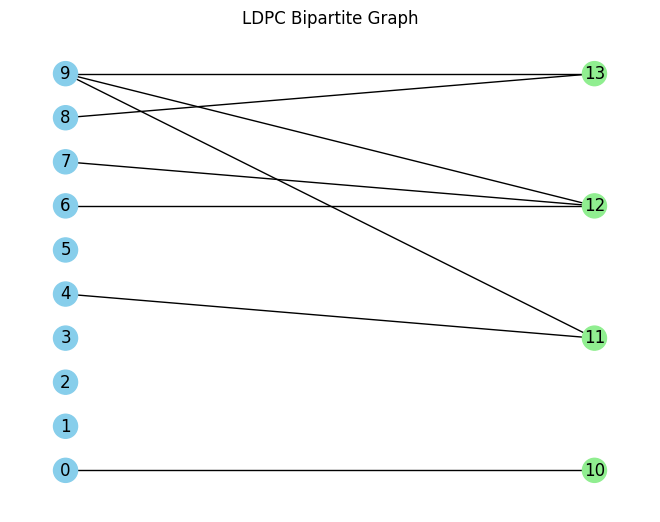

In [1]:
from linearcodes import RandomLDPC

ldpc1 = RandomLDPC(num_bits=10,num_parity_checks=4,parity_check_weights=[3])
print(f"Parity check equations for ldpc1: {ldpc1.parity_checks}")
print("The Tanner graph of ldpc1.")
tanner_graph1 = ldpc1.draw_graph()

## Quantum error correction

The power of quantum computing comes from generalising the notion of a classical bit to a _qubit_. A classical bit is a system with a binary attribute, such as a light switch that is either off (0) or on (1). At any given time, the system occupies exactly one of the two states, 0 or 1. 

A qubit differs crucially from a classical bit. It is not a piece of information that lives in a discrete state 0 or 1, but one that can exist as a linear combination of the two states and only under measurement does in live in one of the states 0 or 1. In particular, a qubit is a physical system with a measurement operator such that the following hold:
- Prior to measurement the state of the system can be represented by a unit vector in two-dimensional complex space.
- When measured the system yields one of two binary outcomes.

Note from a mathematical point of view, a classical bit is simply a special case of a qubit that is always confined to the states 0 and 1.

#### Example: Spin states

The Stern-Gerlach experiment passes atoms through a special magnetic field and their resulting positions detected on a screen. The atoms accumulate in exactly two distinct locations, conventionally referred to as _spin up_ and _spin down_. That is, after measurement the experiment has two possible outcomes. Therefore, this system appears to be analogous to a classical bit. However, there is one fundamental difference.

The crucial difference between a bit and a qubit is what happens _before_ measurement. In the classical situation, the light switch is always either on or off even when it is unobserved. In contrast, prior to being detected on the screen, an atom is not necessarily in a _spin up_ or _spin down_ state. Instead, it is in a state that combines both possibilities and only upon measurement does the atom collapse to one of the two outcomes. More precisely, it is a linear combination of the two states spin up and spin down. Mathematically, this is notion is familiar: a state is a vector. In particular, the state is a directional vector in three-dimensional space. Interactions with other physical objects, like the electromagnetic fields, change this state continuously, for example by rotating it. But it's value is not known until it is measured.



#### Quantum errors



### Stabilizer codes

### CSS codes

### Homological codes